# Introduction to the dataset

In this tutorial we are concerned with reading in the required dataset as well as gaining an understanding of the data and the relevant features. We are also required to get the data into a useful format. Raw data is very rarely in a perfect format, and so we are almost always required to manipulate it in some way so that it may be useful in analysis and processing.   

## The data

This data set contains information on variables associated with mothers and their newborn infants. The task is to predict whether or not an infant is likely to have a low birth weight (a weight less than 2500g), given a number of factors (predictors) related to the mother. These factors are:

- age  : age of the infant's mother in years
- lwt  : weight of infant's mother in pounds
- race : mothers race (white, black, other)
- smoke: smoking status during pregnancy
- ht   : history of hypertension
- ui   : presence of uterine irritability
- ftv  : number of physician visits during the first trimester
- ptl  : number of previous premature labours

The above factors are possibly predictors of the final two variables:

- bwt  : Weight in grams of infant
- low  : indicator of birth weight less than 2.5kg

These variable 'bwt' implies the outcome of 'low', as a birth weight below 2500g indicates that the binary variable 'low' will obtain a value or 1. For this reason, we will exclude the data in the 'bwt' column. 

## Reading in the data set

Before we load the data set in python, we need to import the Python necessary libraries. While we won't use all these libraries initially, we will use them during the following tutorials.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We then read in our data set and save it to a data frame called df.

In [2]:
df = pd.read_csv('BirthWeights.csv')

Next, we view our data set.

In [3]:
df.head()

,low,age,lwt,race,smoke,ht,ui,ftv,ptl,bwt
0,0,19,182,black,0,0,1,0,0,2523
1,0,33,155,other,0,0,0,1,0,2551
2,0,20,105,white,1,0,0,1,0,2557
3,0,21,108,white,1,0,1,1,0,2594
4,0,18,107,white,1,0,1,0,0,2600


We can see that our data set contains binary, categorical and ordinal variables. 

The .describe() method can be used to get an idea of the measure of spread of the different data columns

In [4]:
df.describe()

,low,age,lwt,smoke,ht,ui,ftv,ptl,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.687831,0.391534,0.063492,0.148148,0.470899,0.158730,2944.656085
std,0.464609,5.298678,30.647150,0.489390,0.244494,0.356190,0.500478,0.366395,729.022417
min,0.000000,14.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3475.000000
max,1.000000,45.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4990.000000


We can use the .info() method to give a summary of the data. It indicates how many data entries (rows) we have, as well as the data type present in each column. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
low      189 non-null int64
age      189 non-null int64
lwt      189 non-null int64
race     189 non-null object
smoke    189 non-null int64
ht       189 non-null int64
ui       189 non-null int64
ftv      189 non-null int64
ptl      189 non-null int64
bwt      189 non-null int64
dtypes: int64(9), object(1)
memory usage: 14.8+ KB


## Data visualisation
Data visualisation is an important tool we use to gain a better understanding of the data and its associated trends. 

#### We start by plotting histograms of the weights of mothers for both low and normal weight infants

Text(0.5,0,'Weight of mother')

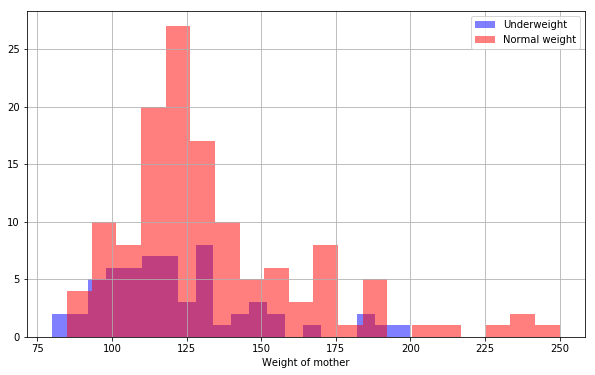

In [6]:
plt.figure(figsize=(10,6))
df[df['low']==1]['lwt'].hist(alpha=0.5,color='blue',
                                              bins=20,label='Underweight')
df[df['low']==0]['lwt'].hist(alpha=0.5,color='red',
                                              bins=20,label='Normal weight')
plt.legend()
plt.xlabel('Weight of mother')

We can confirm that there are definitely less instances of low weight births in comparison to normal weigh births. Additionally, this graph provides no obvious correlation of birth mother weights to low infant weights. 

#### Now let's count the instances of low and normal infant births by comparing races

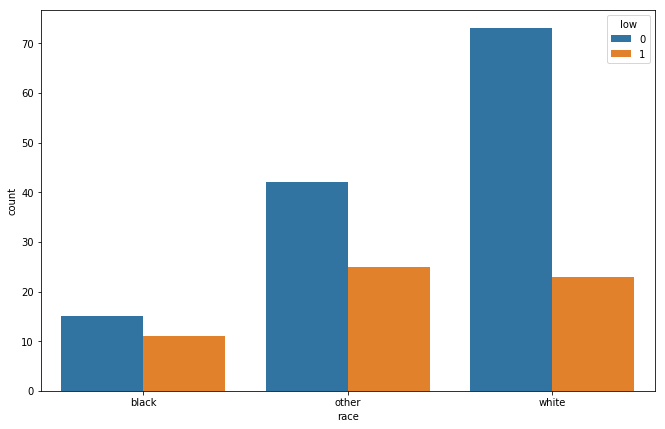

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='race',hue='low',data=df)

It appears that a little less than half the number of black mothers have underweight infants, while only around one quarter of white mothers appear to have underweight infants. One important factor to note, however, is that there is more data on white mothers, than black mothers, which may influence these results.

#### Next, we count the number of smokers/nonsmokers for both under/normal infant weights

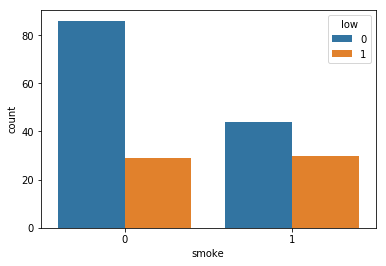

In [8]:
sns.countplot(x='smoke', hue='low', data=df)

We can see that a little under half the number of smokers have underweight infants, while approximately one quarter of nonsmokers have underweight babies, suggesting that that smoking may affect the weight of infants

#### Next, we compare the classified weights of infants based on whether or not the mother has had a premature labour 

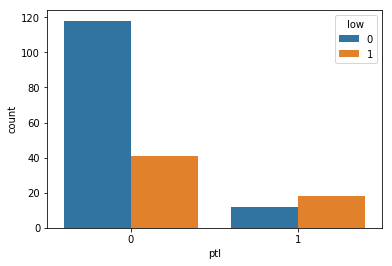

In [9]:
sns.countplot(x='ptl', hue='low', data=df)

 Looking at this countplot, we see that of the mothers who have previously had premature labours, majority of them give birth to underweight infants

## Data preprocessing

Now that we have read in our data set and familiarised ourselves with it, we can start our data manipulation. One thing we can notice from the output above is that 'race' is of type object, while the other columns are all int64. Let's have a closer look at this column.

In [10]:
df['race'].value_counts()

white    96
other    67
black    26
Name: race, dtype: int64

We can see that the 'race' column is categorical, containing categories of black, white and other. One thing we can see from this data set is that there are considerbly more white mothers than any other race. 
### Categorical data
Since most machine learning algorithms are algebraic, they cannot cope with categorical data and so it must be transformed into numerical data. This is done through encoding the categorical column. The way we encode the data depends whether or not it is ordinal or not. If we have $n$ categories and they are ordinal, then we can encode the column by assigning each category within the column a value ranging from 0 to $n-1$, if not we create $n-1$ binary columns, each representing one of the $n$ categories, removing one of them.

We are going to focus on non-ordinal categories, since that is what our data contains. This requires us to create a column for each individual category and use binary variables to determine which category is relevant. As an example, lets consider a 'Gender' column, which will include either 'Male' or 'Female'. The 'Gender' will be replaced by two columns that might look something like:

| Male | Female|
|------|------|
|   1  | 0    |
|   1  | 0    |
|   0  | 1    |
|   1  | 0    |

There is one problem though. Since the one column implies the state of the other (i.e. if there is a 1 in the 'Male' column we know for certain that there is a 0 in the 'Female' column), these columns are multicollinear, meaning that one column may be predicted by the state of one of more of the other columns. To overcome this, we remove either one of these columns, so that we are just left with:

| Female|
|------|
| 0    |
| 0    |
| 1    |
| 0    |

We see that we still have the same amount of information contained in this single column. In general, if we are encoding a column containing $n$ unique categories, we will end up with $n-1$ binary columns once we have encoded them. 

#### Now let's encode the categorical data column in our data set

In [11]:
df = pd.get_dummies(df,columns=['race'],drop_first=True)
df.head()

,low,age,lwt,smoke,ht,ui,ftv,ptl,bwt,race_other,race_white
0,0,19,182,0,0,1,0,0,2523,0,0
1,0,33,155,0,0,0,1,0,2551,1,0
2,0,20,105,1,0,0,1,0,2557,0,1
3,0,21,108,1,0,1,1,0,2594,0,1
4,0,18,107,1,0,1,0,0,2600,0,1


The 'race' column was removed and replaced by the two binary columns, 'race_other' and 'race_white'. There is no 'race_black' column as enough information is given by the other two race columns. As an example, if we want to indicate the race of a mother is black, having a zero in both columns indicates that the mother is niether white, nor any other race (excluding black), and must therefore be black.

Now that all our data columns are in a numerical format, we take a look at the range of each column.

In [12]:
df.describe().loc[['min','max']]

,low,age,lwt,smoke,ht,ui,ftv,ptl,bwt,race_other,race_white
min,0.0,14.0,80.0,0.0,0.0,0.0,0.0,0.0,709.0,0.0,0.0
max,1.0,45.0,250.0,1.0,1.0,1.0,1.0,1.0,4990.0,1.0,1.0


If we look at the table above we can see that most of our features involve binary variables, thus lying between 0 and 1. Some values have a much larger range (especially the 'lwt' column) which has the potential to attach a larger importance to this variable, which we do not want. In order to overcome this, we standardise the features so that they all have mean 0 and a standard deviation of 1. We ignore columns 'low' and 'bwt' beacuse they are what we are trying to predict (since 'bwt' implies 'low', they are basically the same variable).

### Standardising Features
We rescale the features by making use of 'StandardScaler', which operates using the following formula:
$$ x' = \frac{x - \bar{x}}{\sigma} $$
This formula is applied to the relevant features. From now on, we make use of these new features values.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['low','bwt'],axis=1))

We don't include the 'low' and 'bwt' columns since that is what we are trying to predict. Now that we have our scaled our features, we put them back into a data frame, setting the column names to be the original names, excluding 'bwt' and 'low', since they were not scaled. This data frame is then concatenated with the 'bwt' and 'low' column from the original data frame. 

In [15]:
data = pd.DataFrame(X,columns=df.drop(['low','bwt'],axis=1).columns)
data_final = pd.concat([data,df[['bwt','low']]],axis=1)

data_final.head()

,age,lwt,smoke,ht,ui,ftv,ptl,race_other,race_white,bwt,low
0,-0.801965,1.711452,-0.802171,-0.260378,2.397916,-0.943398,-0.434372,-0.741067,-1.016001,2523,0
1,1.847222,0.828116,-0.802171,-0.260378,-0.417029,1.059998,-0.434372,1.349406,-1.016001,2551,0
2,-0.612737,-0.807690,1.246617,-0.260378,-0.417029,1.059998,-0.434372,-0.741067,0.984251,2557,0
3,-0.423509,-0.709542,1.246617,-0.260378,2.397916,1.059998,-0.434372,-0.741067,0.984251,2594,0
4,-0.991192,-0.742258,1.246617,-0.260378,2.397916,-0.943398,-0.434372,-0.741067,0.984251,2600,0


Our data set is now ready to use! The final step is to save our new data frame to a csv file that we can access later in following tutorials.

In [16]:
data_final.to_csv('BirthWeightData_final.csv')